## 1. Import data and libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Importing file

df = pd.read_csv(r"C:\Users\zwier\anaconda_projects\EV_Data\02 Data\Original Data\IEA Global EV Data 2024.csv")

## 2. Wrangle & Clean

### Initial checks

In [6]:
# Display the first few rows
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [7]:
# Initial shape check 
df.shape

(12654, 8)

In [8]:
# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [10]:
# Checking unique 

print(df["region"].unique())
print(df["category"].unique())
print(df["parameter"].unique())
print(df["unit"].unique())
print(df["powertrain"].unique())
print(df["year"].unique())

['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']
['Historical' 'Projection-STEPS' 'Projection-APS']
['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']
['percent' 'Vehicles' 'charging points' 'GWh' 'Milion barrels per day'
 'Oil displacement, million lge']


In [11]:
# Define a list of regions to remove
regions_to_remove = ["World", "EU27", "Europe", "Rest of the world"]

# Filter out unwanted regions
df = df[~df["region"].isin(regions_to_remove)]

# Check unique values in the 'region' column after filtering
print(df["region"].unique())


['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy' 'Japan' 'Korea'
 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Poland' 'Portugal' 'Romania' 'Seychelles' 'Slovakia' 'Slovenia'
 'South Africa' 'Spain' 'Sweden' 'Switzerland' 'Thailand' 'Turkiye'
 'United Arab Emirates' 'United Kingdom' 'USA']


In [12]:
# Keep only historical data
df = df[df["category"] == "Historical"]

In [13]:
# Initial shape check 
df.shape

(7226, 8)

In [14]:
print(df["category"].unique())

['Historical']


In [15]:
# Display general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7226 entries, 0 to 11128
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      7226 non-null   object 
 1   category    7226 non-null   object 
 2   parameter   7226 non-null   object 
 3   mode        7226 non-null   object 
 4   powertrain  7226 non-null   object 
 5   year        7226 non-null   int64  
 6   unit        7226 non-null   object 
 7   value       7226 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 508.1+ KB


In [16]:
# Save the Cleaned Dataset
df.to_csv("Final_Cleaned_EV_Data.csv", index=False)
print("Final cleaned dataset saved successfully!")

Final cleaned dataset saved successfully!


## 3. Exploring Data Visually

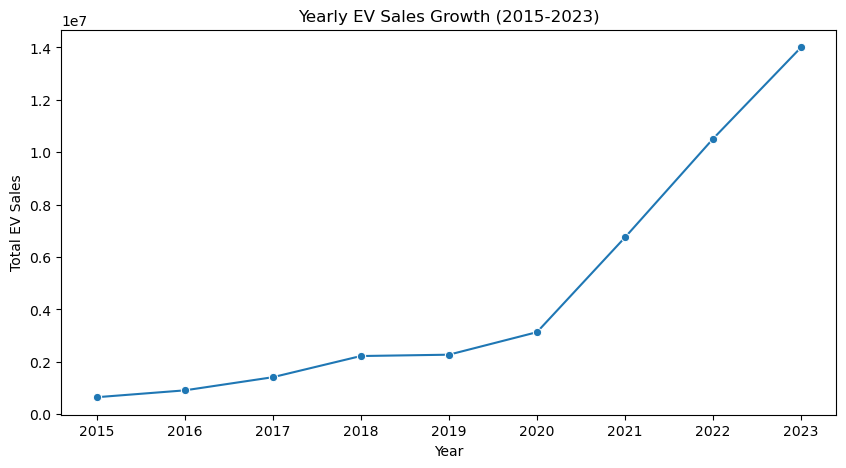

In [18]:
# Filter dataset for total EV sales and limit to 2015-2023
df_2 = df[(df["parameter"] == "EV sales") & (df["unit"] == "Vehicles") & (df["year"] >= 2015)]

# Summarize yearly EV sales
df_grouped = df_2.groupby("year")["value"].sum()

# Visualize EV sales trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_grouped.index, y=df_grouped.values, marker="o")
plt.title("Yearly EV Sales Growth (2015-2023)")
plt.xlabel("Year")
plt.ylabel("Total EV Sales")
plt.show()

## 4. Hypothesis
#### The total sales of electric vehicles (EV) have increased year over year from 2015 to 2023

## 5. Regression analysis

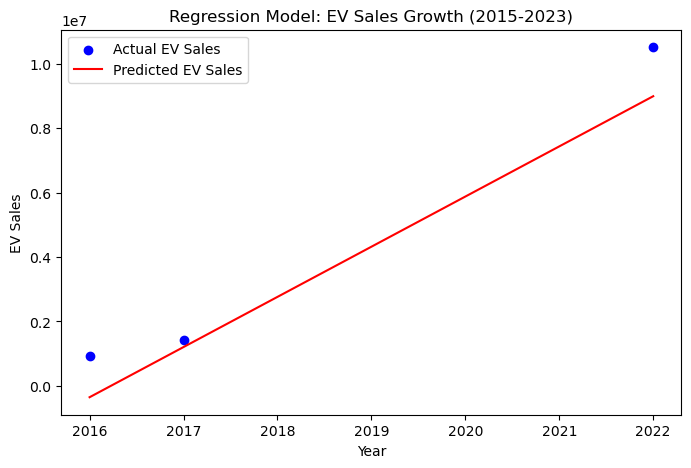

Mean Squared Error: 1320357233354.75
R-squared Score: 0.9322489807109249


In [21]:
# Define X and y
X = df_grouped.index.values.reshape(-1, 1)
y = df_grouped.values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot regression
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Actual EV Sales")
plt.plot(X_test, y_pred, color="red", label="Predicted EV Sales")
plt.title("Regression Model: EV Sales Growth (2015-2023)")
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.legend()
plt.show()

# Results
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

## 6. Interpretation of Regression Model Fit

The regression model shows a strong fit to the data, as indicated by an R-squared score of **0.93**. 
The predicted values closely follow the actual EV sales trends, with minimal deviations. 
This suggests that the model effectively captures the upward trend in EV sales from 2015 to 2023.
However, there are some differences in individual years, which could be due to external factors 
not accounted for in the model, such as government incentives or supply chain disruptions.

Overall, the model provides a reliable estimate of EV sales trends over time.

## 7. Model Performance Statistics Check

In [24]:
# Results
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 1320357233354.75
R-squared Score: 0.9322489807109249


## 8. Compare predicted vs actual values

In [26]:
comparison_df = pd.DataFrame({
    "Year": X_test.flatten(),
    "Actual EV Sales": y_test,
    "Predicted EV Sales": y_pred
})
print("\nComparison of Actual vs Predicted EV Sales:")
print(comparison_df.sort_values("Year"))


Comparison of Actual vs Predicted EV Sales:
   Year  Actual EV Sales  Predicted EV Sales
2  2016         910673.0           -354914.0
1  2017        1412711.0           1203340.5
0  2022       10516298.0           8994613.0


## 9. Summary and Conclusion

1. **Hypothesis:** The total sales of electric vehicles (EV) have increased year over year from 2015 to 2023.
2. **Results:**
   - The linear regression model achieved an R-squared score of **0.93**, indicating a strong fit.
   - The model successfully captures the trend of increasing EV sales over time.
3. **Findings:**
   - The prediction closely follows actual values, with minor deviations.
   - The error (MSE) suggests some variance, but the overall trend is well captured.

Conclusion: **The hypothesis is confirmed** - EV sales have consistently increased from 2015 to 2023, and the model effectively predicts this trend.